# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha\left[\frac2n(X^T_{(k)} X_{(k)}w_{old} - X^T_{(k)}y_{(k)}) + \frac{2}{C}w_{old}\right] =
w_{old} - \alpha\left[\frac{2}{n} X^T_{(k)}\left(a_{(k)} - y_{(k)}\right) 
\frac{2}{C}w_{old}\right]
$$
где $X_{(k)} = X[kn:n(k+1),\ :],\ y_{(k)} = y[kn:n(k+1)]$, строки в $X$ и $y$ уже перемешаны, $k$ -- номер батча, $k=\overline{0,(N\ //\ n)},$ если $N \% k \ne 0,$ то в конце эпохи считается последний батч $X_{(k_{last})} = X[k_{last}n:,\ :],\ y_{(k_{last})} = y[k_{last}n:],$ $k_{last} = N\ //\ n$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - \alpha\left[\frac{1}{n\ln b}X^T(a - y) + \frac{2}{C}w_{old}\right], $$
где $a = \sigma (Xw).$ Почему:
$$\sigma ' (x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma (1 - \sigma)$$
$$
\partial_n^{(w)}\log _b \left(\sigma\left(X^i_{\ k}w^k\right)\right) = 
\{\sigma\left(X^i_{\ k}w^k\right) = a^i\} = 
\frac{1}{\ln b}(1 - a^i)X^i_{\ n}
$$
$$
\partial_n^{(w)}\log _b \left(1 - \sigma\left(X^i_{\ k}w^k\right)\right) = 
-\frac{1}{\ln b} a^i X^i_{\ n}
$$
$$
\partial_n^{(w)}L(w) = 
\frac{-1}{n\ln b}\sum_{i=1}^{n}\left[y_i(1-a^i)X^i_{\ n} - (1-y_i)a^i X^i_{\ n}\right] + 
\frac{2}{C}(w_{old})_n = \frac{1}{n\ln b}X_{in}(a - y)^i + \frac{2}{C}(w_{old})_n
$$
 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

Пусть $L(w) =  \frac{1}{N}||y - Xw||^2.$ Из лекции первая производная:
$$N\partial_m L(w) = 2X_{im}X^{i}_{\phantom{i} k}w^k - 2X_{im}y^i.$$
Найдём вторую производную:
$$N\partial_n\partial_m L(w) = 
\partial_n(2X_{im}X^{i}_{\phantom{i} k}w^k) = 
2X_{im}X^{i}_{\phantom{i} k}\partial_n w^k = 
2X_{im}X^{i}_{\phantom{i} k}\delta^k_n = 
2X_{im}X^{i}_{\phantom{i} n} = (X^TX)_{mn}$$
Покажем, что матрица $X^TX$ положительно определена. Пусть $b$ -- произвольный ненулевой вектор. Покажем, что и $с = Xb$ тоже ненулевой. Так как у матрицы $X$ число строк не меньше числа столбцов и она имеет максимальный ранг, то её ранг равен $D$. Следовательно, у матрицы $X$ есть $D$ линейно независимых строк $X^{i_1}, X^{i_2}, ..., X^{i_D}$. Составим из них матрицу $D\times D$
$$\tilde X = 
\begin{pmatrix}
X^{i_1}\\
X^{i_2}\\
...\\
X^{i_D}
\end{pmatrix}.$$
Так как $X^{i_k}b = X^{i_k}_{\phantom{i_k} j}b^j = c^{i_k},$ то, составив вектор 
$\tilde c = (c^{i_1}, c^{i_2}, ..., c^{i_D})^T,$ получим:
$$\tilde X b = \tilde c,$$
а так как у $\tilde X$ все строки линейно независимы, то есть $det \tilde X \ne 0$ и матрица не вырождена, и $b \ne \theta$, то и $\tilde c \ne \theta$ ($\theta$ -- нулевой вектор). Следовательно, $c \ne \theta.$ Тогда,
$$b^T X^TX b = (Xb)^T Xb = c^Tc = ||c||^2 > 0$$

Пусть $L(w) =  \frac{1}{N}||y - Xw||^2 + \frac{1}{C}||w||^2$. Приравняем первую производную к нулю:
$$\partial_m L(w) = \partial_m\frac{1}{N}||y - Xw||^2 + \partial_m\frac{1}{C}||w||^2.$$
Производную от первого слагаемого считали на лекции:
$$\partial_m\frac{1}{N}||y - Xw||^2 = \frac2N(X^T Xw - X^Ty)_m.$$
Найдем производную от второго слагаемого:
$$\partial_m\frac{1}{C}||w||^2 = \partial_m\frac{1}{C} g_{ij}w^iw^j = \frac{1}{C} g_{ij}(w^j\partial_m w^i + w^i\partial_m w^j) = \frac{1}{C} g_{ij}(w^j\delta_m^i + w^i\delta_m^j) = \frac{1}{C}(w_i\delta_m^i + w_j\delta_m^j) = \frac{2}{C}w_m.$$
Приравниваю всю производную к нулю, получим
$$
\partial L(w) = \frac2N(X^T Xw - X^Ty) + \frac{2}{C}w = 0,\\
\left(\frac1N X^T X + \frac{1}{C}I\right)w = \frac1N X^Ty,\\
w = \frac1N\left(\frac1N X^T X + \frac{1}{C}I\right)^{-1} X^Ty = \left(X^T X + \frac{N}{C}I\right)^{-1} X^Ty,
$$
если $X^T X + \frac{N}{C}I$ обратима.
Очевидно, что $\partial \partial L(w) = \frac{2}{N}X^T X + \frac{2}{C}I$ положительно определена.

Если есть ЛЗ признаки, т.е. у матрицы $X$ есть ЛЗ столбцы, так что $rankX < D$, то $dim(kerX) = D - rankX \ne 0.$ Тогда квадратичная форма с матрицей $X^T X$ вырождена, т.к. для $b \in kerX$ значение квадратичной формы равно нулю: $b^TX^T Xb = ||Xb||^2 = 0$. Тогда $detX^T X = 0.$ Если $detX^T X = 0,$ т.е. какие-то собственные значения этой матрицы равны нулю (т.к. матрица симметрична), то у матрицы $detX^T X + \frac{N}{C}I$ все СЗ сдвинуты на $\frac{N}{C} > 0$ и уже не будут равны нулю, т.к. СЗ матрицы $X^T X$ неотрицательны, т.к. если бы было такое $\lambda < 0$ и такой $b \ne \theta$, что $X^T Xb = \lambda b$, то:
$$
b^TX^T Xb = \lambda b^Tb,\\
||Xb||^2 = \lambda ||b||^2 < 0,
$$
что невозможно.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

Пусть основание логарифма равно $b$. Опустим далее $x_i$ и заменим $p(y_i=1)=:p(1),\ p(y_i=0)=:p(0)$. Найдём первую производную
$$
\frac{d}{da}E = -p(1)\frac{1}{a\ln b} + p(0)\frac{1}{(1-a)\ln b} = 
\frac{1}{\ln b}\left[-p(1)\frac1a + \frac1{1-a} - p(1)\frac1{1-a}\right] = 
\frac{1}{\ln b}\left[\frac1{1-a} - \frac{p(1)}{a(1-a)}\right].
$$
Приравняем производную к нулю:
$$
\frac{d}{da}E = \frac{1}{\ln b}\left[\frac1{1-a} - \frac{p(1)}{a(1-a)}\right] = 0\ |\cdot a(1-a)\ln b,\\
a - p(1) = 0,\\
a = p(1).
$$
Найдём теперь вторую производную:
$$
\frac{d^2}{da^2}E = \frac{1}{\ln b}\frac{d}{da}\left[\frac1{1-a} - \frac{p(1)}{a(1-a)}\right] =
\frac{1}{\ln b}\left[\frac{1}{(1-a)^2} + \frac{p(1)(1-2a)}{a^2(1-a)^2}\right] = 
\frac{1}{\ln b}\left[\frac{a^2 + p(1)(1-2a)}{a^2(1-a)^2}\right].
$$
Подставляем $a = p(1)$:
$$
\frac{d^2}{da^2}E = \frac{1}{\ln b}\left[\frac{p(1)^2 + p(1)(1-2p(1))}{p(1)^2(1-p(1))^2}\right] = 
\frac{1}{\ln b}\left[\frac{p(1) + (1-2p(1))}{p(1)(1-p(1))^2}\right] = 
\frac{1}{\ln b}\left[\frac{1-p(1)}{p(1)(1-p(1))^2}\right] > 0
$$
при $b > 1.$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
#%load_ext pycodestyle_magic

In [7]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    order = np.arange(y.size)
    zero_feature = np.ones((batch_size, 1), dtype=X.dtype)
    if shuffle:
        np.random.shuffle(order)

    right = 0
    for i in range(y.size // batch_size):
        left = i*batch_size
        right = left + batch_size
        X_batch = np.hstack([zero_feature, X[order[left:right], :]])
        y_batch = y[order[left:right]]
        yield (X_batch, y_batch)
    if y.size % batch_size != 0:
        zero_feature = np.ones((y.size-right, 1), dtype=X.dtype)
        X_batch = np.hstack([zero_feature, X[order[right:], :]])
        y_batch = y[order[right:]]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [8]:
#%%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    sigm_value_x = 1 / (1 + np.exp(-1*x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(
        self,
        batch_generator,
        batch_size=1,
        C=1,
        alpha=0.01,
        max_epoch=10,
        model_type='lin_reg',
        prob=0.5
    ):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.batch_size = batch_size
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.prob = prob

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        n = y_batch.size
        if self.model_type == 'lin_reg':
            a = X_batch @ self.weights
            loss = (1/n)*np.sum((y_batch-a)**2) + (1/self.C)*np.sum(self.weights**2)

        if self.model_type == 'log_reg':
            one = np.ones(n)
            a = sigmoid(X_batch @ self.weights)
            loss = ((-1/n)*(y_batch @ np.log(a) + (one - y_batch) @ np.log(one - a)) + 
                    (1/self.C)*np.sum(self.weights**2))

        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        n = y_batch.size
        if self.model_type == 'lin_reg':
            XTXw = X_batch.T @ (X_batch @ self.weights)
            XTy = X_batch.T @ y_batch
            loss_grad = (2/n)*(XTXw - XTy) + (2/self.C)*self.weights
            #loss_grad = loss_grad/(np.sqrt(np.dot(loss_grad, loss_grad)))

        if self.model_type == 'log_reg':
            a = sigmoid(X_batch @ self.weights)
            loss_grad = (-1/n)*X_batch.T @ (y_batch - a) + (2/self.C)*self.weights

        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """

        self.weights -= self.alpha*new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        # Нужно инициализровать случайно веса
        self.weights = np.random.rand(X.shape[1]+1)
        #self.weights = np.zeros(X.shape[1]+1)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)

        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''

        zero_feature = np.ones((X.shape[0],1), dtype=X.dtype)
        y_hat = np.dot(np.hstack([zero_feature, X]), self.weights)
        if self.model_type == 'log_reg':
            y_hat = sigmoid(y_hat)
        y_hat = y_hat >= self.prob
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [9]:
def plot_decision_boundary(clf, min_x, max_x):
    print("w0, w1, w2 =", clf.weights)
    if clf.model_type == 'lin_reg':
        prob = 0.5
    elif clf.model_type == 'log_reg':
        prob = 0

    def y(x):
        return (prob - clf.weights[1]*x - clf.weights[0])/clf.weights[2]
    x1 = np.array([min_x, max_x])
    x2 = np.array([y(x1[0]), y(x1[1])])
    plt.plot(x1, x2)

w0, w1, w2 = [ 0.01449448  0.12403781 -0.0934884 ]


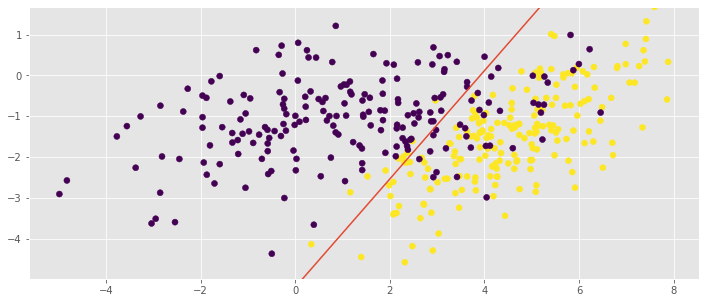

w0, w1, w2 = [-0.05125621  0.14915881 -0.00320048]


(-4.98467510774949, 1.6761418633126515)

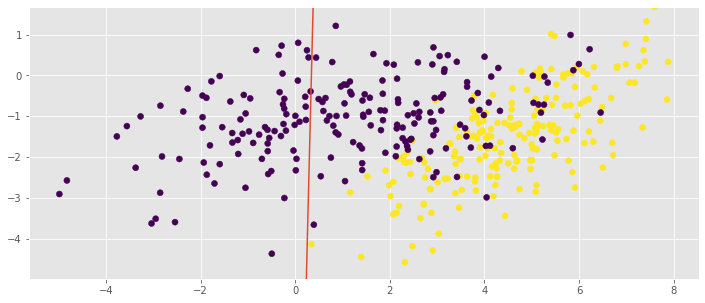

In [10]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=0.001)
clf.fit(X, y)
plot_decision_boundary(clf, np.min(X[:, 0]), np.max(X[:, 0]))

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.ylim(np.min(X[:, 0]), np.max(X[:, 1]))
plt.show()

clf = MySGDClassifier(batch_generator, model_type='log_reg', alpha=0.001)
clf.fit(X, y)
plot_decision_boundary(clf, np.min(X[:, 0]), np.max(X[:, 0]))

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.ylim(np.min(X[:, 0]), np.max(X[:, 1]))

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [11]:
from sklearn.datasets import make_classification

In [12]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

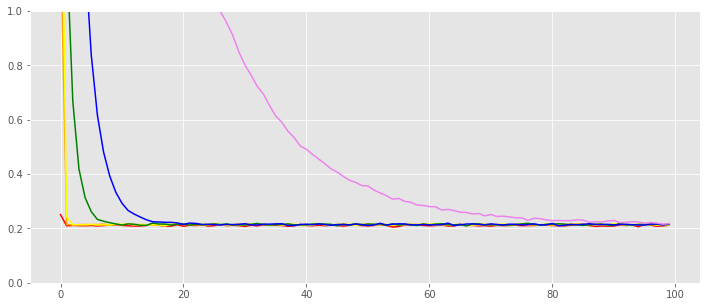

In [13]:
alphas = [0.1, 0.01, 0.005, 0.001, 0.0005, 0.0001]
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'violet']
fig = plt.figure()
ax = fig.add_subplot(111)
for k in range(len(alphas)):
    clf = MySGDClassifier(batch_generator,
                          alpha=alphas[k],
                          batch_size=100,
                          model_type='lin_reg')
    clf.fit(X, y)
    loss = []
    N = 100
    count = len(clf.errors_log['iter']) // N
    for i in range(count):
        loss.append(sum(clf.errors_log['loss'][i*N:(i+1)*N])/N)
    ax.plot(range(count), loss, color=colors[k])
plt.ylim(0,1)
plt.show()

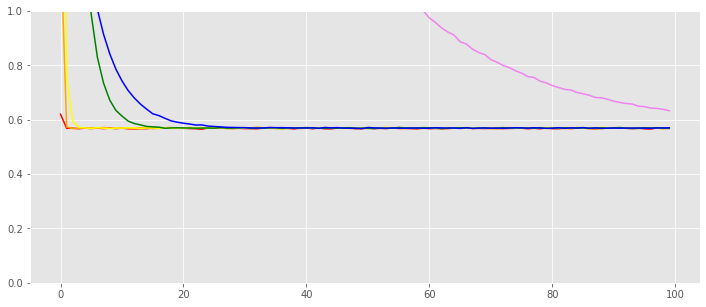

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
for k in range(len(alphas)):
    clf = MySGDClassifier(batch_generator,
                          alpha=alphas[k],
                          batch_size=100,
                          model_type='log_reg')
    clf.fit(X, y)
    loss = []
    N = 100
    count = len(clf.errors_log['iter']) // N
    for i in range(count):
        loss.append(sum(clf.errors_log['loss'][i*N:(i+1)*N])/N)
    ax.plot(range(count), loss, color=colors[k])
plt.ylim(0,1)
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

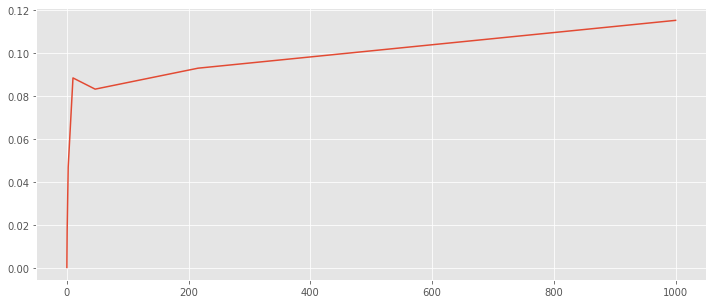

In [15]:
weights = []
for C in np.logspace(3, -3, 10):
    clf = MySGDClassifier(batch_generator,
                          batch_size=100,
                          C=C,
                          alpha=0.0001,
                          model_type='lin_reg')
    clf.fit(X, y)
    avg_w = np.sum(clf.weights)/clf.weights.size
    weights.append(avg_w)
plt.plot(np.logspace(3, -3, 10), weights)

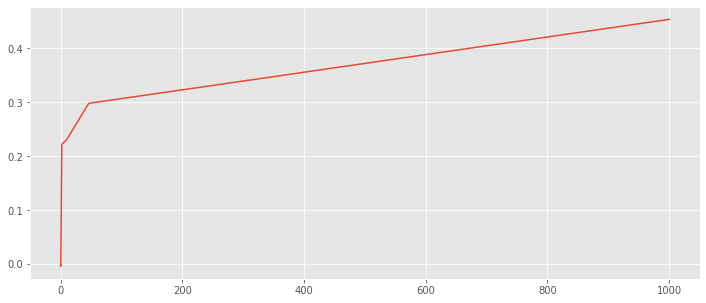

In [16]:
weights = []
for C in np.logspace(3, -3, 10):
    clf = MySGDClassifier(batch_generator,
                          batch_size=100,
                          C=C,
                          alpha=0.0001,
                          model_type='log_reg')
    clf.fit(X, y)
    avg_w = np.sum(clf.weights)/clf.weights.size
    weights.append(avg_w)
plt.plot(np.logspace(3, -3, 10), weights)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [17]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [18]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [19]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [20]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
tf_X_train = scaler.transform(X_train)

clf = MySGDClassifier(batch_generator,
                      alpha=0.1,
                      max_epoch=10,
                      batch_size=200,
                      model_type='log_reg')
clf.fit(tf_X_train, y_train)

MySGDClassifier(alpha=0.1,
                batch_generator=<function batch_generator at 0x7f073e85f830>,
                batch_size=200, model_type='log_reg')

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [22]:
from sklearn import model_selection
scores = model_selection.cross_val_score(clf, tf_X_train, y_train, cv = 5, scoring='f1')
scores.sum()/scores.size

0.6140139642632361

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [23]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, pair_id))
    
X_test = []
groups_test = []
pairs_id = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title, pair_id) in enumerate(docs):
        groups_test.append(new_group)
        pairs_id.append(pair_id)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, pair_id_j= docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
pairs_id = np.array(pairs_id)
print (X_test.shape, groups_test.shape, pairs_id.shape)

(16627, 15) (16627,) (16627,)


In [24]:
scaler = StandardScaler()
scaler.fit(X_test)
tf_X_test = scaler.transform(X_test)

predict = clf.predict(tf_X_test)

In [25]:
my = [{'pair_id':pairs_id[i], 'target':int(predict[i])} for i in range(pairs_id.size)]
df = pd.DataFrame.from_dict(my)
df.to_csv(r'my_predict.csv', index = False, header=True)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***